In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import random

from sklearn.dummy import DummyRegressor

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, Normalizer

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import seaborn as sns

%matplotlib notebook

In [3]:
df19 = pd.read_csv("June19_cleaned.csv")
df19.drop("Unnamed: 0", axis=1, inplace=True)
df20 = pd.read_csv("June20_cleaned.csv")
df20.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
df19_cols = df19.columns.tolist()
df20_cols = df20.columns.tolist()

m19,n19 = df19.shape
m20,n20 = df20.shape

print("m19: ", m19, "n19: ", n19)
print("m20: ", m20, "n20: ", n20)

m19:  8143 n19:  258
m20:  6942 n20:  256


In [5]:
y_col = "review_scores_rating"
X19_cols = []

for col in df19_cols:
    if y_col != col:
        X19_cols.append(col) 

X20_cols = []
for col in df20_cols:
    if y_col != col:
        X20_cols.append(col) 
        
print(y_col, "is in X19_cols: ", y_col in X19_cols)
print(y_col, "is in X20_cols: ", y_col in X20_cols)

review_scores_rating is in X19_cols:  False
review_scores_rating is in X20_cols:  False


In [6]:
X19 = df19[X19_cols].copy()
y19 = df19[y_col].copy()

X20 = df20[X20_cols].copy()
y20 = df20[y_col].copy()

# Train_test_split

In [7]:
X19_train, X19_test, y19_train, y19_test = train_test_split(X19, y19, test_size=0.2, random_state=42)
X20_train, X20_test, y20_train, y20_test = train_test_split(X20, y20, test_size=0.2, random_state=42)

# 2019

Dummy scores: [-59.09581659 -64.42689187 -57.21367006 -56.25375371 -63.64218358]
Mean dummy score: -60.12646316232692
Std dummy score : 3.328616882476843
##################################################
C: 1
All scores: [-49.4466093  -57.33127559 -50.72526426 -49.71805693 -54.69613306]
mean score: -52.38346782482548
std  score: 3.1083247739970488
mean_scores[i] -52.38346782482548
std_scores[i] 3.1083247739970488
##################################################
C: 2
All scores: [-49.44534915 -57.33264592 -50.72555834 -49.7243329  -54.70291715]
mean score: -52.38616069004644
std  score: 3.108902588926942
mean_scores[i] -52.38616069004644
std_scores[i] 3.108902588926942
##################################################
C: 3
All scores: [-49.44488768 -57.33313839 -50.72567942 -49.72657602 -54.70531559]
mean score: -52.38711942068733
std  score: 3.1091072296387914
mean_scores[i] -52.38711942068733
std_scores[i] 3.1091072296387914
##################################################
C: 4


Text(0, 0.5, 'MSE +/- SD')

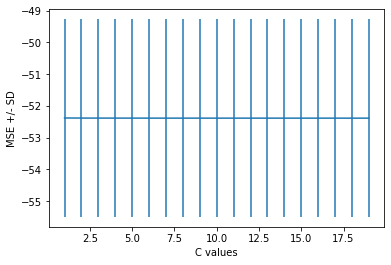

In [10]:
%matplotlib inline
scaler = StandardScaler()

Cs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 

mean_scores = np.zeros(len(Cs))
std_scores = np.zeros(len(Cs))

k_cv = 5

scoring = "neg_mean_squared_error"

dummy_model = DummyRegressor(strategy='mean')
pipesteps = [('scaler', scaler), ('model', dummy_model)]
pipe = Pipeline(pipesteps)
dummyscores = cross_val_score(pipe, X19_train, y19_train, cv=k_cv, scoring=scoring) 

print("Dummy scores:", dummyscores)
print("Mean dummy score:", np.mean(dummyscores))
print("Std dummy score :", np.std(dummyscores))


for i, C in enumerate(Cs):   
    print("##################################################")

    print("C:",C)
    alpha = 1/(2*C)
    model = Ridge(alpha)
    pipesteps = [('scaler', scaler), ('model', model)]
    pipe = Pipeline(pipesteps)

    scores = cross_val_score(pipe, X19_train, y19_train, cv=k_cv, scoring=scoring) 

    print("All scores:", scores)
    print("mean score:", np.mean(scores))
    print("std  score:", np.std(scores))

    mean_scores[i] = np.mean(scores)
    print("mean_scores[i]", mean_scores[i])
    std_scores[i] = np.std(scores)
    print("std_scores[i]", std_scores[i])

fig = plt.figure()
ax = fig.add_subplot()
ax.errorbar(Cs, mean_scores, xerr=0, yerr=std_scores);
ax.set_xlabel("C values")
ax.set_ylabel("MSE +/- SD")

Dummy scores: [-59.09581659 -64.42689187 -57.21367006 -56.25375371 -63.64218358]
Mean dummy score: -60.12646316232692
Std dummy score : 3.328616882476843
##################################################
C: 20
All scores: [-49.44405179 -57.33402393 -50.72591721 -49.73058488 -54.70956443]
mean score: -52.38882845017838
std  score: 3.109469924523765
mean_scores[i] -52.38882845017838
std_scores[i] 3.109469924523765
##################################################
C: 21
All scores: [-49.44404448 -57.33403166 -50.7259194  -49.73061968 -54.70960109]
mean score: -52.38884326021812
std  score: 3.1094730540836255
mean_scores[i] -52.38884326021812
std_scores[i] 3.1094730540836255
##################################################
C: 22
All scores: [-49.44403783 -57.33403868 -50.72592139 -49.73065133 -54.70963443]
mean score: -52.388856730623615
std  score: 3.109475900349838
mean_scores[i] -52.388856730623615
std_scores[i] 3.109475900349838
##################################################
C:

Text(0, 0.5, 'MSE +/- SD')

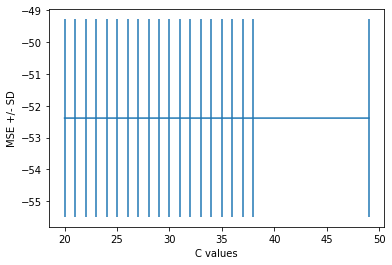

In [14]:
%matplotlib inline
scaler = StandardScaler()

Cs = [20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 49] 

mean_scores = np.zeros(len(Cs))
std_scores = np.zeros(len(Cs))

k_cv = 5

scoring = "neg_mean_squared_error"

dummy_model = DummyRegressor(strategy='mean')
pipesteps = [('scaler', scaler), ('model', dummy_model)]
pipe = Pipeline(pipesteps)
dummyscores = cross_val_score(pipe, X19_train, y19_train, cv=k_cv, scoring=scoring) 

print("Dummy scores:", dummyscores)
print("Mean dummy score:", np.mean(dummyscores))
print("Std dummy score :", np.std(dummyscores))


for i, C in enumerate(Cs):   
    print("##################################################")

    print("C:",C)
    alpha = 1/(2*C)
    model = Ridge(alpha)
    pipesteps = [('scaler', scaler), ('model', model)]
    pipe = Pipeline(pipesteps)

    scores = cross_val_score(pipe, X19_train, y19_train, cv=k_cv, scoring=scoring) 

    print("All scores:", scores)
    print("mean score:", np.mean(scores))
    print("std  score:", np.std(scores))

    mean_scores[i] = np.mean(scores)
    print("mean_scores[i]", mean_scores[i])
    std_scores[i] = np.std(scores)
    print("std_scores[i]", std_scores[i])

fig = plt.figure()
ax = fig.add_subplot()
ax.errorbar(Cs, mean_scores, xerr=0, yerr=std_scores);
ax.set_xlabel("C values")
ax.set_ylabel("MSE +/- SD")

Dummy scores: [-59.09581659 -64.42689187 -57.21367006 -56.25375371 -63.64218358]
Mean dummy score: -60.12646316232692
Std dummy score : 3.328616882476843
##################################################
C: 0.1
All scores: [-49.45204703 -57.31518565 -50.72422231 -49.65609724 -54.63034056]
mean score: -52.35557855824504
std  score: 3.1032648137080194
mean_scores[i] -52.35557855824504
std_scores[i] 3.1032648137080194
##################################################
C: 0.2
All scores: [-49.45190677 -57.32325279 -50.72458185 -49.68302078 -54.65746161]
mean score: -52.368044761255376
std  score: 3.1051473731598715
mean_scores[i] -52.368044761255376
std_scores[i] 3.1051473731598715
##################################################
C: 0.3
All scores: [-49.45052904 -57.32621062 -50.72468318 -49.69522442 -54.67088024]
mean score: -52.37350550054934
std  score: 3.106213602865877
mean_scores[i] -52.37350550054934
std_scores[i] 3.106213602865877
################################################

Text(0, 0.5, 'MSE +/- SD')

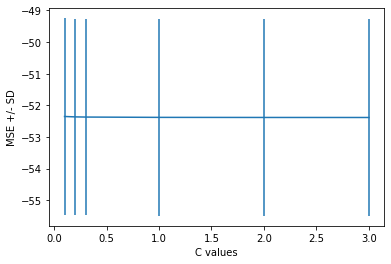

In [18]:
%matplotlib inline
scaler = StandardScaler()

Cs = [0.1,0.2,0.3,1,2,3] 

mean_scores = np.zeros(len(Cs))
std_scores = np.zeros(len(Cs))

k_cv = 5

scoring = "neg_mean_squared_error"

dummy_model = DummyRegressor(strategy='mean')
pipesteps = [('scaler', scaler), ('model', dummy_model)]
pipe = Pipeline(pipesteps)
dummyscores = cross_val_score(pipe, X19_train, y19_train, cv=k_cv, scoring=scoring) 

print("Dummy scores:", dummyscores)
print("Mean dummy score:", np.mean(dummyscores))
print("Std dummy score :", np.std(dummyscores))


for i, C in enumerate(Cs):   
    print("##################################################")

    print("C:",C)
    alpha = 1/(2*C)
    model = Ridge(alpha)
    pipesteps = [('scaler', scaler), ('model', model)]
    pipe = Pipeline(pipesteps)

    scores = cross_val_score(pipe, X19_train, y19_train, cv=k_cv, scoring=scoring) 

    print("All scores:", scores)
    print("mean score:", np.mean(scores))
    print("std  score:", np.std(scores))

    mean_scores[i] = np.mean(scores)
    print("mean_scores[i]", mean_scores[i])
    std_scores[i] = np.std(scores)
    print("std_scores[i]", std_scores[i])

fig = plt.figure()
ax = fig.add_subplot()
ax.errorbar(Cs, mean_scores, xerr=0, yerr=std_scores);
ax.set_xlabel("C values")
ax.set_ylabel("MSE +/- SD")

In [25]:
C = 10
alpha = 1/(2*C)
model = Ridge(alpha)
pipesteps = [('scaler', scaler), ('model', model)]
pipe = Pipeline(pipesteps)

pipe.fit(X19_train, y19_train)
y19_pred = pipe.predict(X19_test)
mse_score = mean_squared_error(y19_test, y19_pred)
r2_score = metrics.r2_score(y19_test, y19_pred)

print(mse_score)
print(r2_score)

51.08158795936982
0.14521176986997875


Dummy scores: [-59.09581659 -64.42689187 -57.21367006 -56.25375371 -63.64218358]
Mean dummy score: -60.12646316232692
Std dummy score : 3.328616882476843
##################################################
C: 50
All scores: [-49.44395934 -57.33412158 -50.72594498 -49.7310247  -54.71002753]
mean score: -52.389015626190485
std  score: 3.109509458861291
mean_scores[i] -52.389015626190485
std_scores[i] 3.109509458861291
##################################################
C: 100
All scores: [-49.44392835 -57.3341543  -50.72595436 -49.73117199 -54.71018247]
mean score: -52.38907829461922
std  score: 3.109522686208108
mean_scores[i] -52.38907829461922
std_scores[i] 3.109522686208108
##################################################
C: 150
All scores: [-49.443918   -57.33416523 -50.7259575  -49.73122116 -54.71023419]
mean score: -52.38909921503314
std  score: 3.1095271007791854
mean_scores[i] -52.38909921503314
std_scores[i] 3.1095271007791854
##################################################


Text(0, 0.5, 'MSE +/- SD')

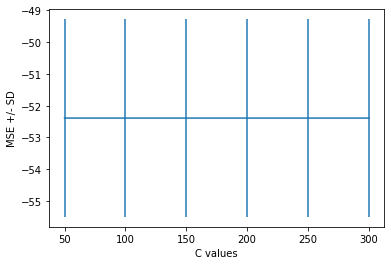

In [15]:
%matplotlib inline
scaler = StandardScaler()

Cs = [50, 100, 150, 200, 250, 300] 

mean_scores = np.zeros(len(Cs))
std_scores = np.zeros(len(Cs))

k_cv = 5

scoring = "neg_mean_squared_error"

dummy_model = DummyRegressor(strategy='mean')
pipesteps = [('scaler', scaler), ('model', dummy_model)]
pipe = Pipeline(pipesteps)
dummyscores = cross_val_score(pipe, X19_train, y19_train, cv=k_cv, scoring=scoring) 

print("Dummy scores:", dummyscores)
print("Mean dummy score:", np.mean(dummyscores))
print("Std dummy score :", np.std(dummyscores))


for i, C in enumerate(Cs):   
    print("##################################################")

    print("C:",C)
    alpha = 1/(2*C)
    model = Ridge(alpha)
    pipesteps = [('scaler', scaler), ('model', model)]
    pipe = Pipeline(pipesteps)

    scores = cross_val_score(pipe, X19_train, y19_train, cv=k_cv, scoring=scoring) 

    print("All scores:", scores)
    print("mean score:", np.mean(scores))
    print("std  score:", np.std(scores))

    mean_scores[i] = np.mean(scores)
    print("mean_scores[i]", mean_scores[i])
    std_scores[i] = np.std(scores)
    print("std_scores[i]", std_scores[i])

fig = plt.figure()
ax = fig.add_subplot()
ax.errorbar(Cs, mean_scores, xerr=0, yerr=std_scores);
ax.set_xlabel("C values")
ax.set_ylabel("MSE +/- SD")

In [26]:
alpha = 1/(2*5)
model = Ridge(alpha)
pipesteps = [('scaler', scaler), ('model', model)]
pipe = Pipeline(pipesteps)

pipe.fit(X19_train, y19_train)
full_pred = pipe.predict(X19_test)
full_mse_score = -mean_squared_error(y19_test, y19_pred)
full_r2_score = metrics.r2_score(y19_test, y19_pred)

print(full_mse_score)
print(full_r2_score)

cols_array = []

for col in X19_cols:
    cols_array.append(col)

-51.08158795936982
0.14521176986997875


In [10]:
alpha = 1/(2*5)
model = Ridge(alpha)
pipesteps = [('scaler', scaler), ('model', model)]
pipe = Pipeline(pipesteps)

pipe.fit(X19_train, y19_train)

weights = pipe.named_steps["model"].coef_
intercept = pipe.named_steps["model"].intercept_

print("Weights: ", weights)
print("Intercept: ", intercept)

Weights:  [ 1.47348080e+00 -3.76237175e-01 -1.11697231e-15  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -3.69213851e-01  0.00000000e+00
  2.59033260e-01 -0.00000000e+00  1.61720844e-02 -0.00000000e+00
  0.00000000e+00 -7.90338621e-02 -0.00000000e+00 -0.00000000e+00
 -1.05088700e-01 -2.09606050e-01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -4.31485131e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.38437897e-02 -0.00000000e+00
  0.00000000e+00 -2.23696431e-02  0.00000000e+00 -3.13678818e-03
 -0.00000000e+00 -0.00000000e+00 -9.84681050e-02  0.00000000e+00
  4.21602105e-02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.02061656e-02
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.77845391e-01
  0.00000000e+00  0.00000000e+00  1.82792523e-02  6.48748805e-02
  1.00658636e-01 -2.79036555e-02  0.00000000e+00  2.83673597e-02
  0.00000000e+0

<ipython-input-27-e9100d0dc023>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drop_df.features, rotation=90);
<ipython-input-27-e9100d0dc023>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drop_df.features[0:num_features], rotation=90);


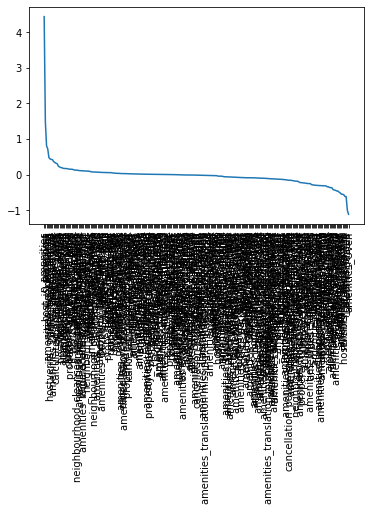

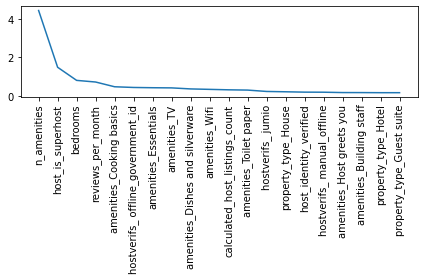

In [27]:
alpha = 1/(2*5)
model = Ridge(alpha)
pipesteps = [('scaler', scaler), ('model', model)]
pipe = Pipeline(pipesteps)

pipe.fit(X19_train, y19_train)

weights = pipe.named_steps["model"].coef_
intercept = pipe.named_steps["model"].intercept_

drop_df = pd.DataFrame()
drop_df["features"] = X19_cols
drop_df["weights"] = weights

drop_df.sort_values(by='weights', ascending=False, inplace=True)

num_features = 20

fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(drop_df.features, drop_df.weights)
ax.set_xticklabels(drop_df.features, rotation=90);

fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(drop_df.features[0:num_features], drop_df.weights[0:num_features])
ax.set_xticklabels(drop_df.features[0:num_features], rotation=90);

plt.tight_layout()

In [28]:
len(weights)

257

In [29]:
len(weights[weights > 0])

100

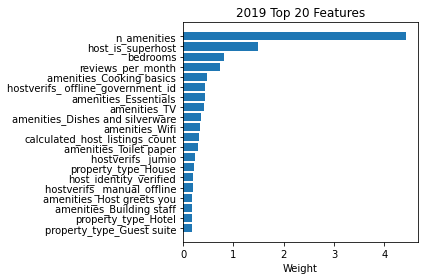

In [30]:
drop_df.features = drop_df.features[0:num_features]
drop_df.weights = drop_df.weights[0:num_features]

drop_df.sort_values(by='weights', ascending=True, inplace=True)

fig = plt.figure()
ax = fig.add_subplot()
ax.barh(drop_df.features[0:num_features], drop_df.weights[0:num_features])
ax.set_title("2019 Top 20 Features")
ax.set_xlabel("Weight")

plt.tight_layout()

# 2020

Dummy scores: [-73.0941106  -72.70527172 -64.78393964 -70.18289669 -75.35067955]
Mean dummy score: -71.22337964188407
Std dummy score : 3.613287571274191
##################################################
C: 1
All scores: [-63.82847845 -63.55925331 -58.21109687 -61.58918988 -66.06335361]
mean score: -62.65027442440764
std  score: 2.634225299722155
mean_scores[i] -62.65027442440764
std_scores[i] 2.634225299722155
##################################################
C: 2
All scores: [-62.20541042 -61.57778647 -57.20423028 -59.1428426  -63.75029493]
mean score: -60.776112939250744
std  score: 2.32194952494677
mean_scores[i] -60.776112939250744
std_scores[i] 2.32194952494677
##################################################
C: 3
All scores: [-61.62668039 -60.95682958 -56.92565881 -58.32265065 -62.98645244]
mean score: -60.16365437409136
std  score: 2.218633404874983
mean_scores[i] -60.16365437409136
std_scores[i] 2.218633404874983
##################################################
C: 4
All 

Text(0, 0.5, 'MSE +/- SD')

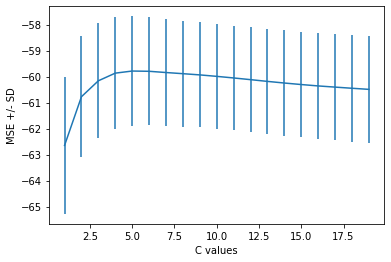

In [15]:
%matplotlib inline
scaler = StandardScaler()

Cs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 

mean_scores = np.zeros(len(Cs))
std_scores = np.zeros(len(Cs))

k_cv = 5

scoring = "neg_mean_squared_error"

dummy_model = DummyRegressor(strategy='mean')
pipesteps = [('scaler', scaler), ('model', dummy_model)]
pipe = Pipeline(pipesteps)
dummyscores = cross_val_score(pipe, X20_train, y20_train, cv=k_cv, scoring=scoring) 

print("Dummy scores:", dummyscores)
print("Mean dummy score:", np.mean(dummyscores))
print("Std dummy score :", np.std(dummyscores))


for i, C in enumerate(Cs):   
    print("##################################################")

    print("C:",C)
    alpha = 1/(2*C)
    model = Ridge(alpha)
    pipesteps = [('scaler', scaler), ('model', model)]
    pipe = Pipeline(pipesteps)

    scores = cross_val_score(pipe, X20_train, y20_train, cv=k_cv, scoring=scoring) 

    print("All scores:", scores)
    print("mean score:", np.mean(scores))
    print("std  score:", np.std(scores))

    mean_scores[i] = np.mean(scores)
    print("mean_scores[i]", mean_scores[i])
    std_scores[i] = np.std(scores)
    print("std_scores[i]", std_scores[i])

fig = plt.figure()
ax = fig.add_subplot()
ax.errorbar(Cs, mean_scores, xerr=0, yerr=std_scores);
ax.set_xlabel("C values")
ax.set_ylabel("MSE +/- SD")

In [16]:
C = 5
alpha = 1/(2*C)
model = Ridge(alpha)
pipesteps = [('scaler', scaler), ('model', model)]
pipe = Pipeline(pipesteps)

pipe.fit(X20_train, y20_train)
y20_pred = pipe.predict(X20_test)
mse_score = mean_squared_error(y20_test, y20_pred)
r2_score = metrics.r2_score(y20_test, y20_pred)

print(mse_score)
print(r2_score)

65.04276466786199
0.1312421894775042


In [17]:
alpha = 1/(2*5)
model = Ridge(alpha)
pipesteps = [('scaler', scaler), ('model', model)]
pipe = Pipeline(pipesteps)

pipe.fit(X20_train, y20_train)
full_pred = pipe.predict(X20_test)
full_mse_score = -mean_squared_error(y20_test, y20_pred)
full_r2_score = metrics.r2_score(y20_test, y20_pred)

print(full_mse_score)
print(full_r2_score)

cols_array = []

for col in X20_cols:
    cols_array.append(col)

-65.04276466786199
0.1312421894775042


In [18]:
alpha = 1/(2*5)
model = Ridge(alpha)
pipesteps = [('scaler', scaler), ('model', model)]
pipe = Pipeline(pipesteps)

pipe.fit(X20_train, y20_train)

weights = pipe.named_steps["model"].coef_
intercept = pipe.named_steps["model"].intercept_

print("Weights: ", weights)
print("Intercept: ", intercept)

Weights:  [ 1.59684044e+00 -3.43505396e-01 -2.04730484e-17  9.86980498e-02
 -1.08846864e-03  0.00000000e+00 -2.93058286e-01 -0.00000000e+00
  3.06322632e-01 -0.00000000e+00  1.68380459e-01  0.00000000e+00
  0.00000000e+00 -7.52026595e-02  0.00000000e+00 -2.38195183e-01
 -2.46207396e-01 -3.09036707e-01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -2.47938099e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -4.63496241e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.61972149e-01  0.00000000e+00 -1.78262291e-01
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.19010246e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.93122188e-02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -1.91758947e-03  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.22814692e-01  0.00000000e+00
  0.00000000e+00  1.80669254e-01 -0.00000000e+00  4.17822279e-02
 -0.00000000e+0

<ipython-input-33-9c0081702f68>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drop_df.features, rotation=90);
<ipython-input-33-9c0081702f68>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drop_df.features[0:num_features], rotation=90);


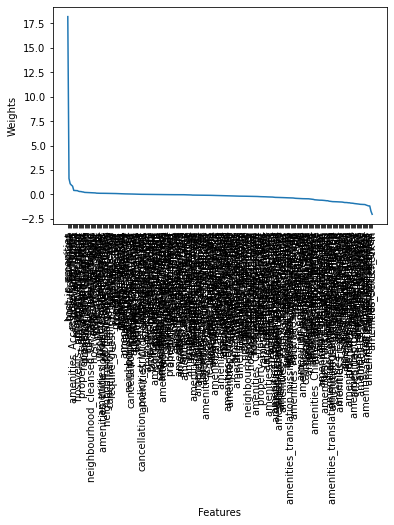

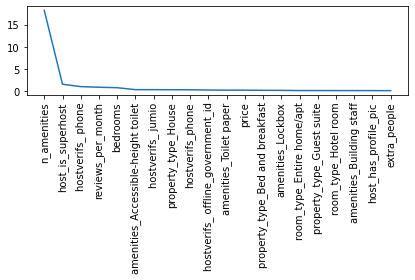

In [33]:
alpha = 1/(2*5)
model = Ridge(alpha)
pipesteps = [('scaler', scaler), ('model', model)]
pipe = Pipeline(pipesteps)

pipe.fit(X20_train, y20_train)

weights = pipe.named_steps["model"].coef_
intercept = pipe.named_steps["model"].intercept_

drop_df = pd.DataFrame()
drop_df["features"] = X20_cols
drop_df["weights"] = weights

drop_df.sort_values(by='weights', ascending=False, inplace=True)

num_features = 20

fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(drop_df.features, drop_df.weights)
ax.set_xticklabels(drop_df.features, rotation=90);
ax.set_xlabel("Features")
ax.set_ylabel("Weights")

fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(drop_df.features[0:num_features], drop_df.weights[0:num_features])
ax.set_xticklabels(drop_df.features[0:num_features], rotation=90);


plt.tight_layout()

In [20]:
len(weights)

255

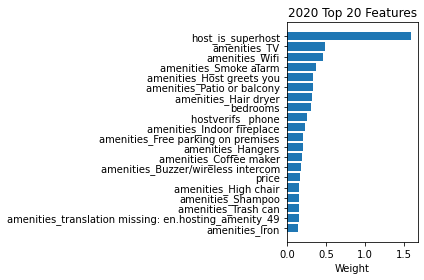

In [21]:
drop_df.features = drop_df.features[0:num_features]
drop_df.weights = drop_df.weights[0:num_features]

drop_df.sort_values(by='weights', ascending=True, inplace=True)

fig = plt.figure()
ax = fig.add_subplot()
ax.barh(drop_df.features[0:num_features], drop_df.weights[0:num_features])
ax.set_title("2020 Top 20 Features")
ax.set_xlabel("Weight")

plt.tight_layout()